In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [25]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
# В текущем задании имеем две независимых выборки с нормальным распределением
# При заданном выше правиле генерации значений выборок видно, что выборка A является подмножеством выборки B
# Это дает основания выбрать для анализа критерий Стьюдента
# Ваш код.
stats.ttest_ind(A, B)
# Тест показывает, что p-value выше 5 процентов, а значит выборки нельзя считать отличающимися, они очень похожи.
# Таким образом будем считать, что эффект применения двух препаратов примерно совпадает.

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

(array([ 1.,  2.,  6., 12., 19., 18., 19., 11.,  9.,  3.]),
 array([-68.59955678, -54.16957782, -39.73959887, -25.30961991,
        -10.87964096,   3.550338  ,  17.98031695,  32.41029591,
         46.84027486,  61.27025382,  75.70023277]),
 <BarContainer object of 10 artists>)

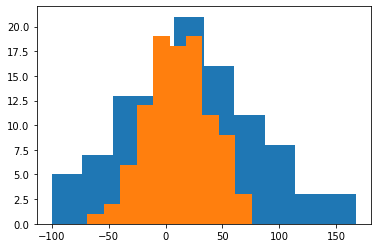

In [11]:
# На гистограмме видно, что результаты по выборкам практически перекрывают друг друга, 
# что может говорить об отсутствии значимых различий. 
# Однако видно, что небольшое смещение данных A влево все-таки визуально заметно
plt.hist(B)
plt.hist(A)


In [26]:
# Интереса ради посмотрим, что даст критерий Вилкоксона, который можно использовать для независимых выборок
stats.wilcoxon(A, B)
# Любопытно, что эта проверка заставляет более внимательно отнестись к альтернативной гипотезе - p-value в данном случае 
# меньше 5 процентов, а значит можно все-таки предположить, что результаты по препаратам A и B немного отличаются.

WilcoxonResult(statistic=1930.0, pvalue=0.04077572901549266)

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [8]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
# В текущем задании имеем две ЗАВИСИМЫЕ выборки с нормальным распределением, которые, видимо, получаются
# при исследовании одних и тех же людей, но с разрывом по времени. 
# При заданном выше правиле генерации значений выборок при этом видно, что выборка A является подмножеством выборки B, 
# т.е. одни и те же люди, видимо, получают препарат как минимум дважды? 
# Мне кажется, это очень некорректно, или я опять не понял условия задачи.
# Тем не менее посмотрим, что покажет тест Манна-Уитни 
# Ваш код.
stats.mannwhitneyu(A, B)
# Результаты этого теста говорят о том, что даже двукратная доза лекарства не меняет эффективности лечения.
# p-value при сравнении этих двух групп оказывается больше 0.05

MannwhitneyuResult(statistic=4343.0, pvalue=0.054347680446611354)

(array([ 1.,  2.,  6., 12., 19., 18., 19., 11.,  9.,  3.]),
 array([-68.59955678, -54.16957782, -39.73959887, -25.30961991,
        -10.87964096,   3.550338  ,  17.98031695,  32.41029591,
         46.84027486,  61.27025382,  75.70023277]),
 <BarContainer object of 10 artists>)

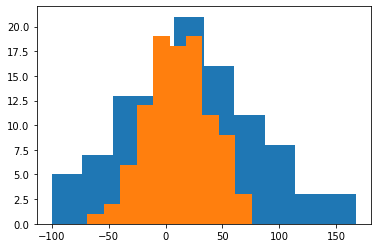

In [10]:
# На гистограмме видно, что результаты по выборкам практически перекрывают друг друга, что говорит об отсутствии различий
plt.hist(B)
plt.hist(A)

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобрением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [12]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
# воспользуемся функцией f_oneway из пакета scipy.stats
# Ваш код.
# Вначале смотрим различия для всех групп
stats.f_oneway(water, nutri, mineral)
# Получаем предельно низкое значение p_value, показывающее, что как минимум две из трех групп отличаются сильно.

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

In [16]:
# Сравним отдельно с помощью того же критерия (а также с помощью критериев Манна-Уитни и Стьюдента)
# полив огурцов минералкой и водой
disp = stats.f_oneway(water, mineral)
print(disp)
mann = stats.mannwhitneyu(water, mineral)
print(mann)
stud = stats.ttest_ind(water, mineral)
print(stud)
# Видим, что данные по результатам дисперсионного анализа и анализа по критерию Стьюдента фактически дают идентичные результаты
# которые говорят о том, что полив минералкой и водой дают примерно одинаковые результаты.
# Критерий Манна-Уитни дал чуть менее яркий, но такой же убедительный результат об отсутствии различий.

F_onewayResult(statistic=0.010260999552998775, pvalue=0.9198340218471527)
MannwhitneyuResult(statistic=206.5, pvalue=0.46801215572055677)
Ttest_indResult(statistic=0.10129659201078253, pvalue=0.919834021847144)


In [23]:
# А теперь сравним минералку с удобрениями по той же схеме
disp_mn = stats.f_oneway(nutri, mineral)
print(disp_mn)
mann_mn = stats.mannwhitneyu(nutri, mineral)
print(mann_mn)
stud_mn = stats.ttest_ind(nutri, mineral)
print(stud_mn)
# Очевидно, что различия радикальные. Хочется верить, что удобрения в данном случае эффективнее :)
# Собственно говоря, это не сложно проверить, посчитав средние значения по выборкам
print(f'Water mean {sum(water)/len(water)}')
print(f'Mineral mean {sum(mineral)/len(mineral)}')
print(f'Nutri mean {sum(nutri)/len(nutri)}')

F_onewayResult(statistic=18.128724672228838, pvalue=0.0001213673340124552)
MannwhitneyuResult(statistic=77.5, pvalue=0.00013713993666752782)
Ttest_indResult(statistic=4.257784009579262, pvalue=0.00012136733401245426)
Water mean 2.85
Mineral mean 2.8095238095238093
Nutri mean 4.666666666666667


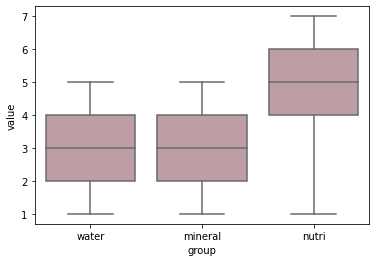

In [18]:
# Смотрим распределения с помощью boxplot
cucumbers = pd.DataFrame()
cucumbers['value'] = water + mineral + nutri 
cucumbers['group'] = ['water']*len(water)+['mineral']*len(mineral)+['nutri']*len(nutri)
ax = sns.boxplot(x='group', y='value', data=cucumbers, color='#c299a2')

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотреть влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [34]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head(50)
#data.describe()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель (игрок??) вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель (игрок??) вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [30]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [10]:
#Ваши выводы

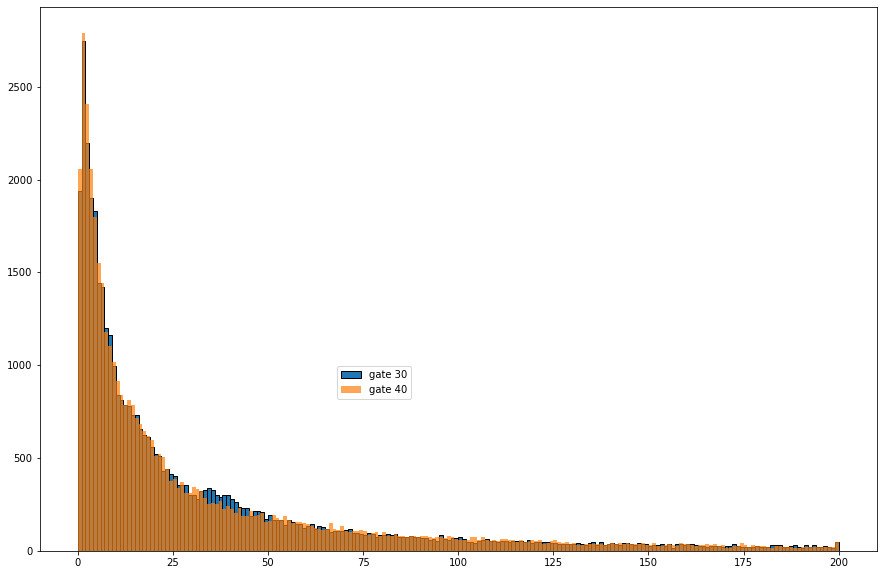

In [31]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**
По этому графику сложно увидеть различия между игроками из двух групп. Есть некоторые более-менее заметные превышения 
игроков из группы gate 30 в интервале между примерно 35 и 45 раундами, но это все, что я могу определить визуально.

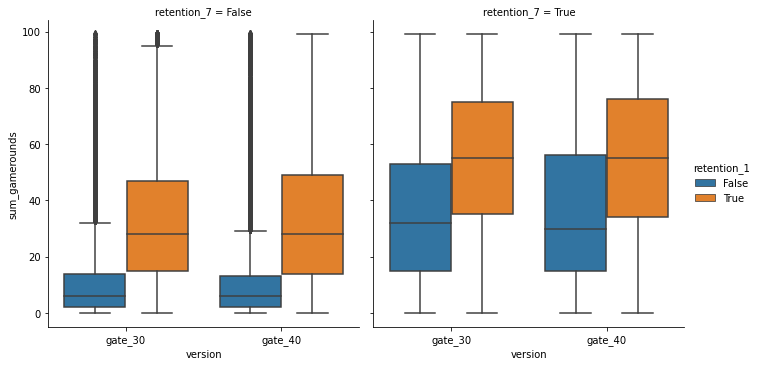

In [32]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

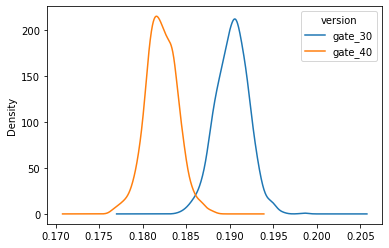

In [13]:
# #Если вдруг оказалось сложно, то вот еще один способ визуализации различий
# # Creating an list with bootstrapped means for each AB-group
# plt.figure(figsize=(15, 10))

# boot_1d = []
# for i in range(1000):
#     boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
#     boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
# boot_1d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
# boot_1d.plot(kind='density')

In [33]:

from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код. 
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [38]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats
# Вроде как предыдущий блок кода показывает, что по количеству раундов особых различий между группами нет,
# но в то же время еще более ранний блок содержит пример кода, который преобразует данные и меняет вид распределения
# с помощью бутстрэпинга.
#Ваш код. 

# Копируем код для отображения графика, комментируем в нем строки, рисующие график,
# и используем серии gate_30 и gate_40 в качестве наборов данных, которые и "скормим" функции f_oneway
#plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
#boot_1d.head()    
# A Kernel Density Estimate plot of the bootstrap distributions
#boot_1d.plot(kind='density')
stats.f_oneway(boot_1d['gate_30'], boot_1d['gate_40'])
# Получаем в результате, что различия между группами радикальные, т.е. p_value фактически оказывается равной 0
# При этом я, если честно, не понимаю, как на основании этого анализа решить о том, где надо ставить ворота :)
# Осторожно предположу, что судя по графику gate_30 работает лучше.

F_onewayResult(statistic=10802.499560612863, pvalue=0.0)

**Ваши выводы?** 

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [39]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

In [40]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [60]:
# Поскольку у нас предположительно - нормальное распределение, можем использовать для анализа критерий Стьюдента
# Вначале получим две выборки колонки Attack для двух классов покемонов, а потом "скормим" из нужной функции
grass_p = pokemon[((pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')) 
                  & ((pokemon['Class 1'] != 'Rock') | (pokemon['Class 2'] != 'Rock'))].Attack
rock_p = pokemon[((pokemon['Class 1'] != 'Grass') | (pokemon['Class 2'] != 'Grass')) 
                  & ((pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock'))].Attack
rock_p.head()
# Самый простой способ доказать различия двух видов покемонов - посчитать среднее значение силы их атаки
print(f'Grass pokemons Attack Mean = {grass_p.mean()}')
print(f'Rock pokemons Attack Mean = {rock_p.mean()}')
# Ну и заодно посмотрим, как отличаются выборки этих групп покемонов, используя критерий стьюдента
stats.ttest_ind(grass_p, rock_p)

# Цифры говорят сами за себя. Выборки отличаются довольно сильно, p_value = 0.0004, ну и средние значения отличаются заметно

Grass pokemons Attack Mean = 73.46315789473684
Rock pokemons Attack Mean = 90.72413793103448


Ttest_indResult(statistic=-3.6123310718800608, pvalue=0.0004125367100834457)

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [66]:
# Абсолютно похожее задание, и решить его можно с использованием тех же методов.
water_p = pokemon[((pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')) 
                  & ((pokemon['Class 1'] != 'Normal') | (pokemon['Class 2'] != 'Normal'))].Speed
normal_p = pokemon[((pokemon['Class 1'] != 'Water') | (pokemon['Class 2'] != 'Water')) 
                  & ((pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal'))].Speed
#water_p.head()
# Самый простой способ доказать различия двух видов покемонов - посчитать среднее значение их скорости
# Еще более информативным будет посмотреть, нет ли выбросов в выборках, как "ложатся" значения по персентилям
print(f'Water pokemons Speed Mean = {water_p.mean()}')
print(water_p.describe())
print(f'Normal pokemons Speed Mean = {normal_p.mean()}')
print(normal_p.describe())
# Ну и заодно посмотрим, как отличаются выборки этих групп покемонов, используя критерий стьюдента
stats.ttest_ind(water_p, normal_p)

# Цифры говорят сами за себя. Выборки отличаются, p_value = 0.032 (меньше 5 процентов)
# но при этом средние значения скорости у "водяных" ниже, чем у нормальных. Очень жаль, но придется разочаровать проф. Оука.

Water pokemons Speed Mean = 64.98412698412699
count    126.000000
mean      64.984127
std       22.664151
min       15.000000
25%       50.000000
50%       65.000000
75%       80.750000
max      122.000000
Name: Speed, dtype: float64
Normal pokemons Speed Mean = 72.24509803921569
count    102.000000
mean      72.245098
std       28.286524
min        5.000000
25%       50.000000
50%       71.500000
75%       92.500000
max      135.000000
Name: Speed, dtype: float64


Ttest_indResult(statistic=-2.1520464979893306, pvalue=0.032453585526529216)

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [88]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
treated_p = pokemon[(pokemon['Name'].isin(treathed_pokemon))]
treated_p.head()
#treathed_classes = treated_p['Class 1'].unique().tolist() + treated_p['Class 2'].unique().tolist()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [95]:
# Самая простая проверка - посмотреть средние значения скоростей покемонов, имеющих те же классы, как и у "ускоренных"
# В идеале - написать цикл, который все выведет, но для 5 уникальных классов можно все сделать быстро и вручную
bug_p = pokemon[((pokemon['Class 1'] == 'Bug') | (pokemon['Class 2'] == 'Bug'))].Speed
print(bug_p.describe())
poison_p = pokemon[((pokemon['Class 1'] == 'Poison') | (pokemon['Class 2'] == 'Poison'))].Speed
print(poison_p.describe())
psychic_p = pokemon[((pokemon['Class 1'] == 'Psychic') | (pokemon['Class 2'] == 'Psychic'))].Speed
print(psychic_p.describe())
normal_p = pokemon[((pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal'))].Speed
print(normal_p.describe())
fighting_p = pokemon[((pokemon['Class 1'] == 'Fighting') | (pokemon['Class 2'] == 'Fighting'))].Speed
print(fighting_p.describe())

# Видно, что скорости всех четырех "ускоренных" значительно превышают средние скорости покемонов из таких же классов,
# а иногда и совпадают с максимальными из них.
# поэтому можно было бы считать, что по-крайней мере их, скорее всего, не замедлили :)


count     72.000000
mean      61.680556
std       32.618938
min        5.000000
25%       36.000000
50%       60.000000
75%       85.000000
max      160.000000
Name: Speed, dtype: float64
count     62.000000
mean      65.258065
std       26.904162
min       15.000000
25%       45.500000
50%       62.500000
75%       80.000000
max      145.000000
Name: Speed, dtype: float64
count     90.000000
mean      77.088889
std       35.340604
min       15.000000
25%       48.500000
50%       77.500000
75%      103.000000
max      180.000000
Name: Speed, dtype: float64
count    102.000000
mean      72.245098
std       28.286524
min        5.000000
25%       50.000000
50%       71.500000
75%       92.500000
max      135.000000
Name: Speed, dtype: float64
count     53.000000
mean      76.528302
std       27.906164
min       25.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      135.000000
Name: Speed, dtype: float64


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [28]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
# Дубль задания

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [29]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']